# Python Scripting Project - NBA Analysis
#### by: Gabin DIETSCH - Judith LECOQ - Alexis MALLET - Audran TOURNEUR

First let's import everything we need for this project

In [4]:
import pandas as pd
from pandas import DataFrame
import json
import seaborn as sns
import plotly.express as px
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, metrics
from player_data import create_players_dataset
from sklearn.model_selection import train_test_split

print("Imported everything we need, let's start! ^-^")

Imported everything we need, let's start! ^-^


Performance of NBA players aren't only a display of skills but a complex interplay of various factor. This data-driven expedition delves into the intricacies of player height, age, origin, personal fouls, and their impact on the coveted win rate.

In [5]:
merged = create_players_dataset()
print(merged.head())
# Note:
# FGM = Field Goals Made
# AST = Assists
# REB = Rebounds

   PLAYER_ID  HEIGHT POSITION   WinRate  AvgPointsPerGame  FGM  AST  REB  \
0    1630173  203.20        F  0.545455          9.236364  196   50  328   
1     203500  210.82        C  0.666667          8.595238  157   97  485   
2    1628389  205.74      C-F  0.533333         20.386667  602  240  688   
3    1630534  195.58        G  0.491525          7.915254  165   67  121   
4    1630583  213.36      F-C  0.610390          9.038961  247   97  371   

    FGA   PF  FG_PCT  TOV  OREB  FT_PCT  
0   404  102   0.485   59   100   0.702  
1   263   98   0.597   79   214   0.364  
2  1114  208   0.540  187   184   0.806  
3   386   99   0.427   41    43   0.812  
4   525  143   0.470   60    85   0.750  


We create a dataset with all of our player id, height, position, winrate, average points per game, field goals made, assists, rebounds, field goals attempted, and personal fouls. This is our base for the following analysis of the data.

To start playing with the data, we are going to start asking ourselves if the height of a player has any impact on their performance?

So, let's compute the average win rate by height and plot it.

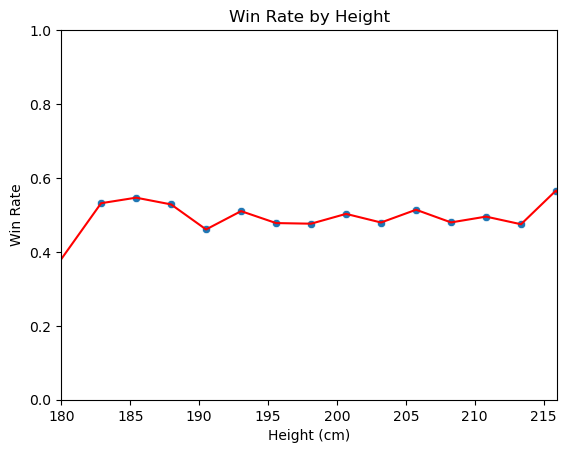

In [6]:
win_rate_by_height = merged.groupby('HEIGHT')['WinRate'].mean()

sns.scatterplot(x=win_rate_by_height.index, y=win_rate_by_height.values)
plt.plot(win_rate_by_height.index, win_rate_by_height.values, color='red')
plt.ylim(0, 1)
plt.xlim(180, 216)
plt.title('Win Rate by Height')
plt.xlabel('Height (cm)')
plt.ylabel('Win Rate')
plt.show()

The graph clearly demonstrates that the height does not really impact the win rate. The win rate is almost the same for all heights. However, we can see that the win rate is slightly higher for players with height 213 cm. This is probably due to the fact that there are only a few players with this height in the dataset. Therefore, we cannot considerate this difference as statistically significant.

But maybe that's because of their team? Let's see the height and average points per game by height.

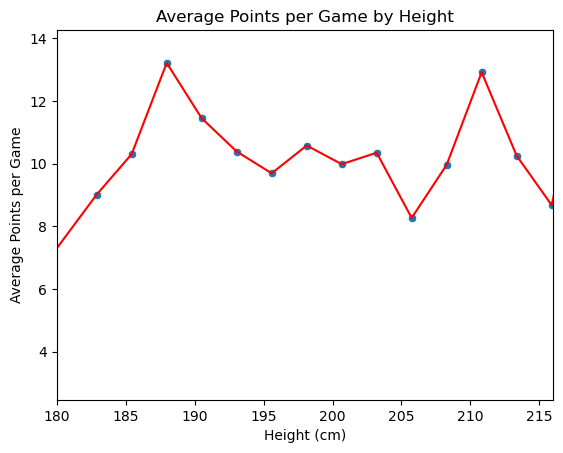

In [7]:
points_by_height = merged.groupby('HEIGHT')['AvgPointsPerGame'].mean()

sns.scatterplot(x=points_by_height.index, y=points_by_height.values)
plt.plot(points_by_height.index, points_by_height.values, color='red')
plt.xlim(180, 216)
plt.title('Average Points per Game by Height')
plt.xlabel('Height (cm)')
plt.ylabel('Average Points per Game')
plt.show()

Once again, we cannot really affirm the presence of a correlation between the height and the average points per game. However, we can notice that the average points per game is slightly lower for player under 185cm, and higher for players between 205cm and 215cm.

Maybe it is due because of their position on the court? Let's see the height and average points per game by position on multiple graphs.
For example, we may think that height has a greater impact on attackers than the defenders? So let's test:


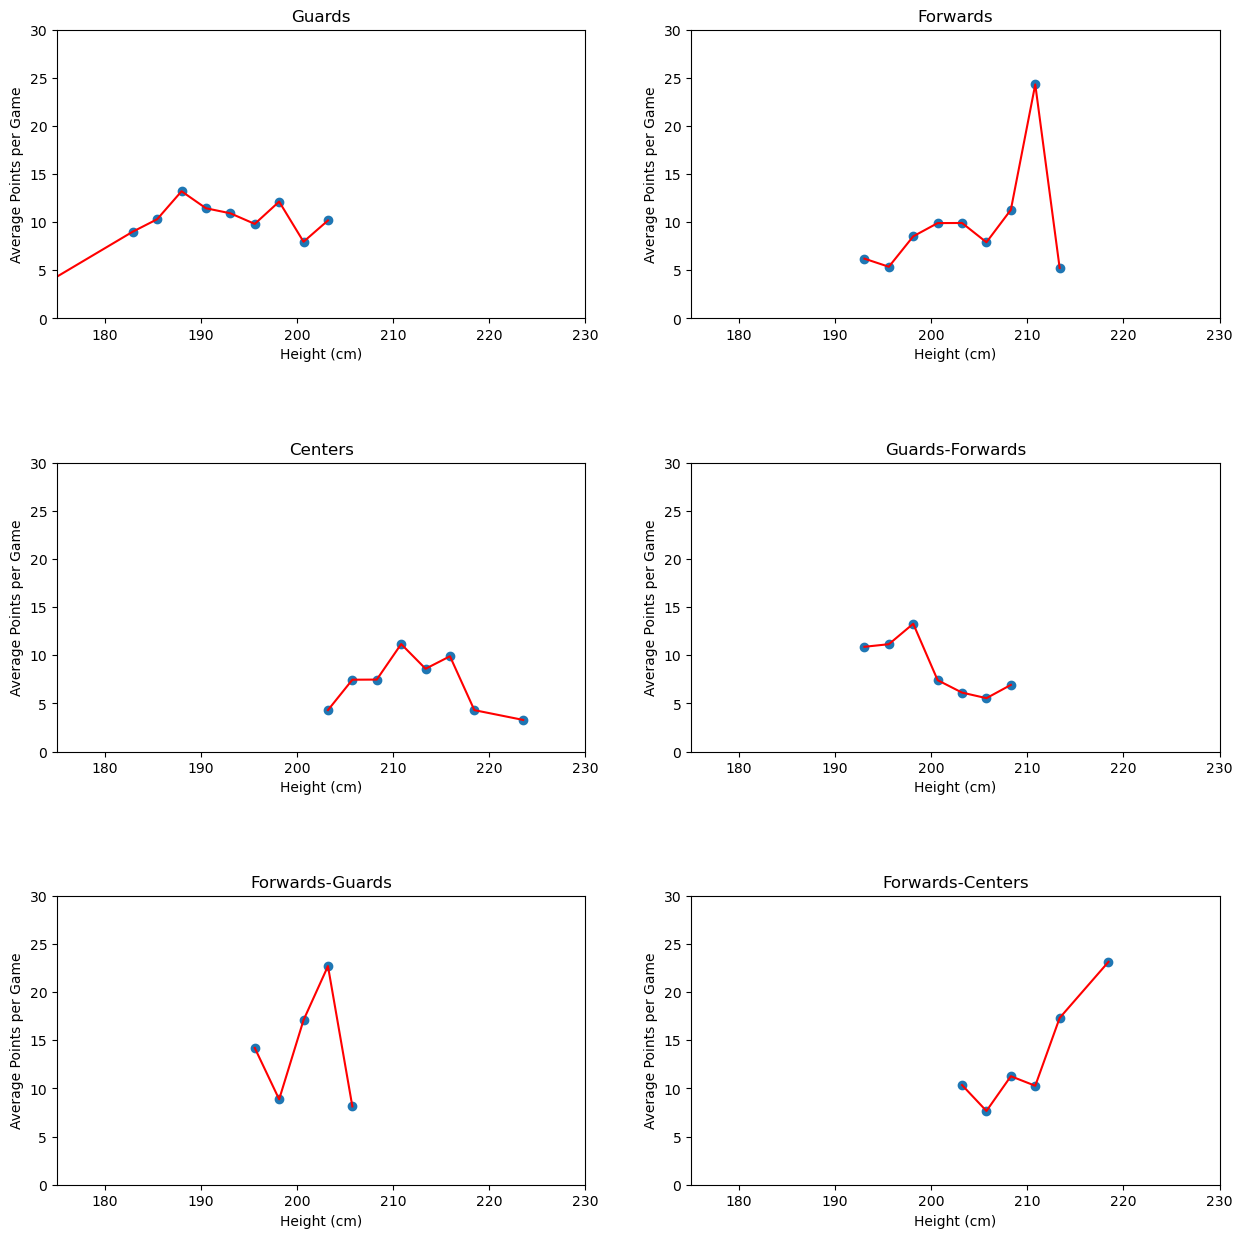

In [8]:
# Position and average points per game and height multiplot plot
# Create a DataFrame for each position (G, F, C, G-F, F-G, F-C, C-F)
guards = merged[merged['POSITION'] == 'G']
forwards = merged[merged['POSITION'] == 'F']
centers = merged[merged['POSITION'] == 'C']
guards_forwards = merged[merged['POSITION'] == 'G-F']
forwards_guards = merged[merged['POSITION'] == 'F-G']
forwards_centers = merged[merged['POSITION'] == 'F-C']
centers_forwards = merged[merged['POSITION'] == 'C-F']

# Calculate the average points per game by height for each position
guards_points_by_height = guards.groupby('HEIGHT')['AvgPointsPerGame'].mean()
forwards_points_by_height = forwards.groupby('HEIGHT')['AvgPointsPerGame'].mean()
centers_points_by_height = centers.groupby('HEIGHT')['AvgPointsPerGame'].mean()
guards_forwards_points_by_height = guards_forwards.groupby('HEIGHT')['AvgPointsPerGame'].mean()
forwards_guards_points_by_height = forwards_guards.groupby('HEIGHT')['AvgPointsPerGame'].mean()
forwards_centers_points_by_height = forwards_centers.groupby('HEIGHT')['AvgPointsPerGame'].mean()

# Plot the data with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
# Add some space between the plots
fig.subplots_adjust(hspace=0.5)
axes[0, 0].scatter(x=guards_points_by_height.index, y=guards_points_by_height.values)
axes[0, 0].plot(guards_points_by_height.index, guards_points_by_height.values, color='red')
axes[0, 0].set_title('Guards')
axes[0, 0].set_xlabel('Height (cm)')
axes[0, 0].set_ylabel('Average Points per Game')
axes[0, 0].set_ylim(0, 30)
axes[0, 0].set_xlim(175, 230)
axes[0, 1].scatter(x=forwards_points_by_height.index, y=forwards_points_by_height.values)
axes[0, 1].plot(forwards_points_by_height.index, forwards_points_by_height.values, color='red')
axes[0, 1].set_title('Forwards')
axes[0, 1].set_xlabel('Height (cm)')
axes[0, 1].set_ylabel('Average Points per Game')
axes[0, 1].set_ylim(0, 30)
axes[0, 1].set_xlim(175, 230)
axes[1, 0].scatter(x=centers_points_by_height.index, y=centers_points_by_height.values)
axes[1, 0].plot(centers_points_by_height.index, centers_points_by_height.values, color='red')
axes[1, 0].set_title('Centers')
axes[1, 0].set_xlabel('Height (cm)')
axes[1, 0].set_ylabel('Average Points per Game')
axes[1, 0].set_ylim(0, 30)
axes[1, 0].set_xlim(175, 230)
axes[1, 1].scatter(x=guards_forwards_points_by_height.index, y=guards_forwards_points_by_height.values)
axes[1, 1].plot(guards_forwards_points_by_height.index, guards_forwards_points_by_height.values, color='red')
axes[1, 1].set_title('Guards-Forwards')
axes[1, 1].set_xlabel('Height (cm)')
axes[1, 1].set_ylabel('Average Points per Game')
axes[1, 1].set_ylim(0, 30)
axes[1, 1].set_xlim(175, 230)
axes[2, 0].scatter(x=forwards_guards_points_by_height.index, y=forwards_guards_points_by_height.values)
axes[2, 0].plot(forwards_guards_points_by_height.index, forwards_guards_points_by_height.values, color='red')
axes[2, 0].set_title('Forwards-Guards')
axes[2, 0].set_xlabel('Height (cm)')
axes[2, 0].set_ylabel('Average Points per Game')
axes[2, 0].set_ylim(0, 30)
axes[2, 0].set_xlim(175, 230)
axes[2, 1].scatter(x=forwards_centers_points_by_height.index, y=forwards_centers_points_by_height.values)
axes[2, 1].plot(forwards_centers_points_by_height.index, forwards_centers_points_by_height.values, color='red')
axes[2, 1].set_title('Forwards-Centers')
axes[2, 1].set_xlabel('Height (cm)')
axes[2, 1].set_ylabel('Average Points per Game')
axes[2, 1].set_ylim(0, 30)
axes[2, 1].set_xlim(175, 230)
plt.show()

These results are interesting, we can observe a clear difference regarding the height of players depending on their position their team.

We notice that certain heights are more likely to be assigned to a position. For instance, players with a height between 180cm and 190cm are more likely to be guards. On the other hand, players with a height between 200cm and 210cm are more likely to be centers. This is probably due to the fact that certain positions require a certain height.

We can also notice that the average points per game is higher for centers players, and lower for guards players. This is probably due to the fact that centers are more likely to be assigned to the role of "scorer" in their team, while guards are more likely to be assigned to the role of "passer" in their team.

We can also check the height distribution of players for each position to see how their height impact their position.

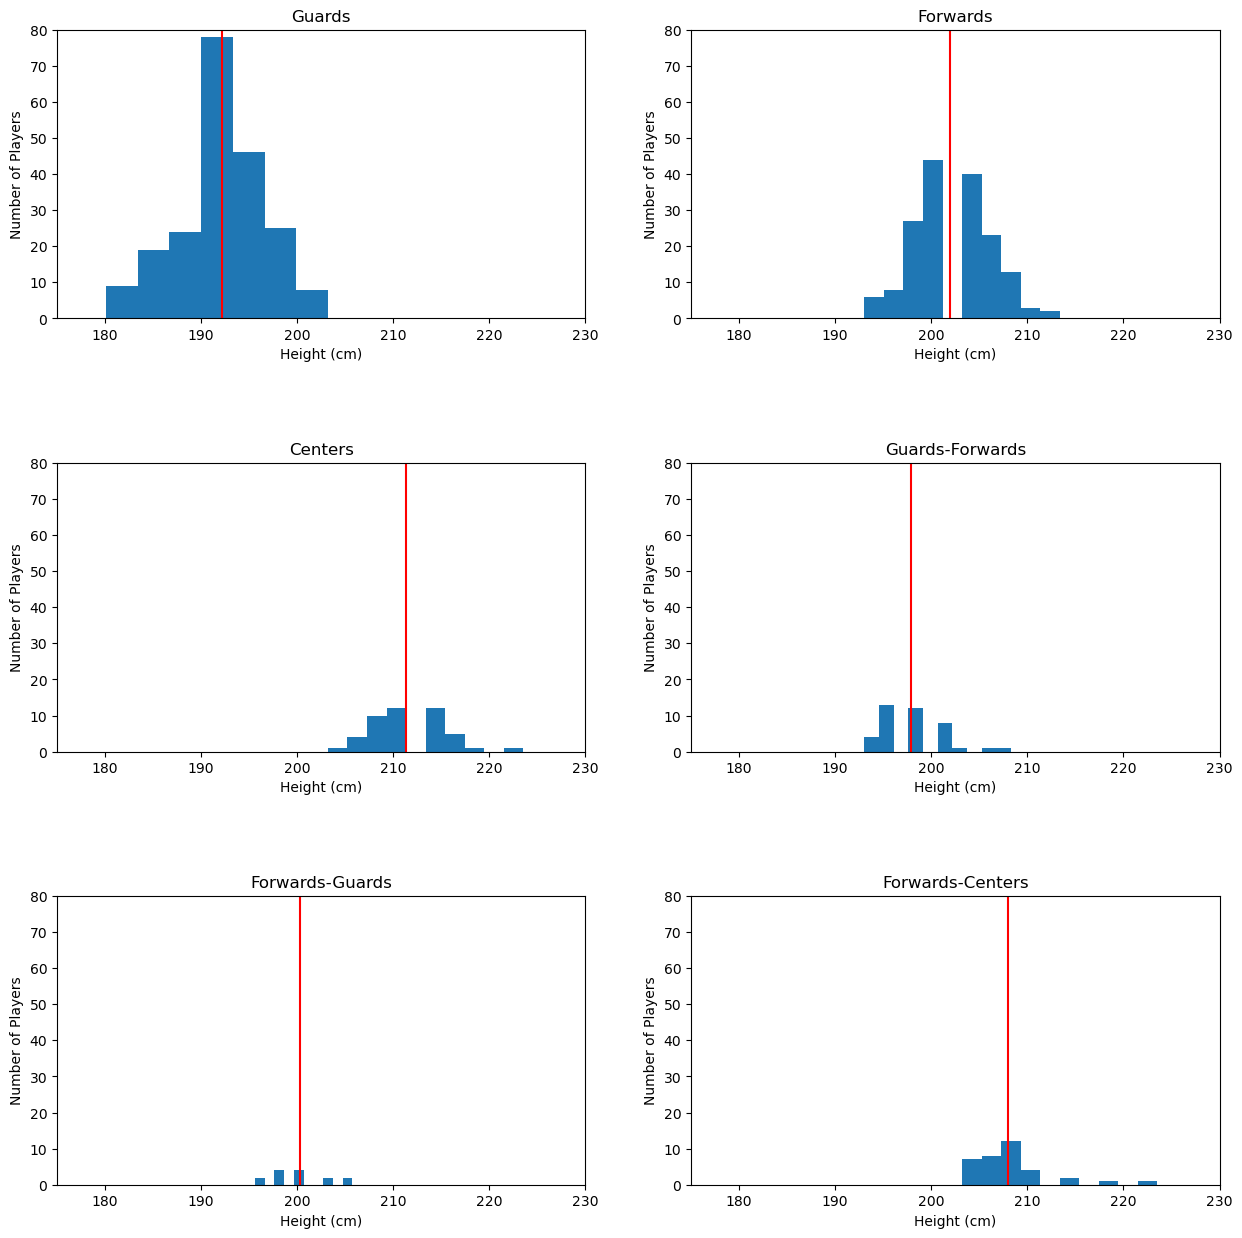

In [9]:
# Read in the stats.json file
df = pd.read_json('../data/players_height_position.json')

# Rename the columns
df.columns = ['PLAYER_ID', 'HEIGHT', 'POSITION']

# Create a subplot with an histogram for each position (G, F, C, G-F, F-G, F-C, C-F)
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Add some space between the plots
fig.subplots_adjust(hspace=0.5)

# Plot the histograms with 10 bins
axs[0, 0].hist(df[df['POSITION'] == 'G']['HEIGHT'], bins=10)
axs[0, 0].set_title('Guards')
axs[0, 0].set_xlabel('Height (cm)')
axs[0, 0].set_ylabel('Number of Players')
axs[0, 0].set_xlim(175, 230)
axs[0, 0].set_ylim(0, 80)
axs[0, 1].hist(df[df['POSITION'] == 'F']['HEIGHT'], bins=10)
axs[0, 1].set_title('Forwards')
axs[0, 1].set_xlabel('Height (cm)')
axs[0, 1].set_ylabel('Number of Players')
axs[0, 1].set_xlim(175, 230)
axs[0, 1].set_ylim(0, 80)
axs[1, 0].hist(df[df['POSITION'] == 'C']['HEIGHT'], bins=10)
axs[1, 0].set_title('Centers')
axs[1, 0].set_xlabel('Height (cm)')
axs[1, 0].set_ylabel('Number of Players')
axs[1, 0].set_xlim(175, 230)
axs[1, 0].set_ylim(0, 80)
axs[1, 1].hist(df[df['POSITION'] == 'G-F']['HEIGHT'], bins=10)
axs[1, 1].set_title('Guards-Forwards')
axs[1, 1].set_xlabel('Height (cm)')
axs[1, 1].set_ylabel('Number of Players')
axs[1, 1].set_xlim(175, 230)
axs[1, 1].set_ylim(0, 80)
axs[2, 0].hist(df[df['POSITION'] == 'F-G']['HEIGHT'], bins=10)
axs[2, 0].set_title('Forwards-Guards')
axs[2, 0].set_xlabel('Height (cm)')
axs[2, 0].set_ylabel('Number of Players')
axs[2, 0].set_xlim(175, 230)
axs[2, 0].set_ylim(0, 80)
axs[2, 1].hist(df[df['POSITION'] == 'F-C']['HEIGHT'], bins=10)
axs[2, 1].set_title('Forwards-Centers')
axs[2, 1].set_xlabel('Height (cm)')
axs[2, 1].set_ylabel('Number of Players')
axs[2, 1].set_xlim(175, 230)
axs[2, 1].set_ylim(0, 80)

# For each subplot, add a vertical line for the mean height by position
axs[0, 0].axvline(x=df[df['POSITION'] == 'G']['HEIGHT'].mean(), color='red')
axs[0, 1].axvline(x=df[df['POSITION'] == 'F']['HEIGHT'].mean(), color='red')
axs[1, 0].axvline(x=df[df['POSITION'] == 'C']['HEIGHT'].mean(), color='red')
axs[1, 1].axvline(x=df[df['POSITION'] == 'G-F']['HEIGHT'].mean(), color='red')
axs[2, 0].axvline(x=df[df['POSITION'] == 'F-G']['HEIGHT'].mean(), color='red')
axs[2, 1].axvline(x=df[df['POSITION'] == 'F-C']['HEIGHT'].mean(), color='red')

# Show the plot
plt.show()

We can see that each position is associated to a different average height. For example, centers players have a mean value of height superior to 210 cm while guards have a mean value of 192 cm. It seems being tall grants a greater advantage to offensive positions.

Now that we have analyzed the height of players, we are going to ask ourselves if age has any impact?

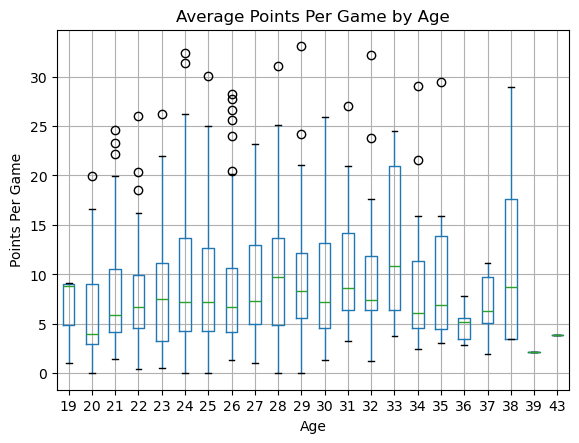

In [10]:
json_data = open('../data/general_players.json').read()
data = json.loads(json_data)

headers = data['resultSets'][0]['headers']
actual_data = data['resultSets'][0]['rowSet']

df = pd.DataFrame(actual_data, columns=headers)
df = df[["AGE", "PTS", "GP"]]

# Calculate the average point per game PTS / GP
df["PPG"] = df["PTS"] / df["GP"]
df["AGE"] = df["AGE"].astype(int)

# Create a boxplot with PPG and AGE:
df.boxplot(column="PPG", by="AGE")
plt.title("Average Points Per Game by Age")
plt.suptitle("")
plt.xlabel("Age")
plt.ylabel("Points Per Game")
plt.show()

It seems that on average the age does not have much of an impact on points scored per game.
The interquartile range (IQR) is much larger for certain age ranges such as 33 years old or 38, showing that their performances are more spread out. Moreover, the median is also slightly even higher for these age ranges, showing that the best players are still able to perform at a high level even at an older age.

We might explain this by the "Survivorship bias", players who are still playing at an older age are still as competitive as the younger ones (otherwise, they would already have retired). However, there is almost no players above 40.

We can also notice that there are way more outliers in the younger age ranges: there are more exceptional players in their twenties.

### Global Courtship
Let's take a detour and observe the origins of NBA talents. There are about 500 total NBA players, about 25% of them are from outside the United States. Does a player's origin says a lot about them?

In [11]:
df = pd.read_json('../data/players_country.json')
df.columns = ['PLAYER_ID', 'COUNTRY']

# Change USA to United States
df['COUNTRY'] = df['COUNTRY'].replace('USA', 'United States')

if __name__ == '__main__':

    d = df['COUNTRY'].value_counts().to_dict()
    # Put each datas in [] to be able to use it in the choropleth
    d = {k: [v] for k, v in d.items()}

    data = pd.DataFrame(d).T.reset_index()
    data.columns = ['country', 'count']

    database = px.data.gapminder().query('year == 2007')

    df = pd.merge(database, data, how='inner', on='country')
    url = (
        "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
    )

    # Ignore United States 
    df_stats = df[df['country'] != 'United States']
    fig = px.choropleth(df_stats,
                        locations="country",  # "iso_alpha",
                        locationmode="country names",  # "ISO-3",
                        geojson=f"{url}/world-countries.json",
                        color="count"
                        )

    # Add a title
    fig.update_layout(title_text='Number of players by country')

    # Add a text to tell the percentage of players in the top 5 countries
    top1 = df['count'].max()
    top2 = df['count'].sort_values(ascending=False).iloc[1]
    top3 = df['count'].sort_values(ascending=False).iloc[2]
    top4 = df['count'].sort_values(ascending=False).iloc[3]
    top5 = df['count'].sort_values(ascending=False).iloc[4]

    top1_country = df[df['count'] == top1]['country'].iloc[0]
    top2_country = df[df['count'] == top2]['country'].iloc[0]
    top3_country = df[df['count'] == top3]['country'].iloc[0]
    top4_country = df[df['count'] == top4]['country'].iloc[0]
    top5_country = df[df['count'] == top5]['country'].iloc[0]

    top1_percentage = round(top1 / df['count'].sum() * 100, 2)
    top2_percentage = round(top2 / df['count'].sum() * 100, 2)
    top3_percentage = round(top3 / df['count'].sum() * 100, 2)
    top4_percentage = round(top4 / df['count'].sum() * 100, 2)
    top5_percentage = round(top5 / df['count'].sum() * 100, 2)

    fig.add_annotation(x=0.5, y=-0.1,
                       text=f'Top 5 countries: {top1_country} ({top1_percentage}%), {top2_country} ({top2_percentage}%), {top3_country} ({top3_percentage}%), {top4_country} ({top4_percentage}%), {top5_country} ({top5_percentage}%)',
                       showarrow=False,
                       xref="paper",
                       yref="paper",
                       font=dict(
                           size=14,
                           color="gray"
                       )
                       )

    fig.show()


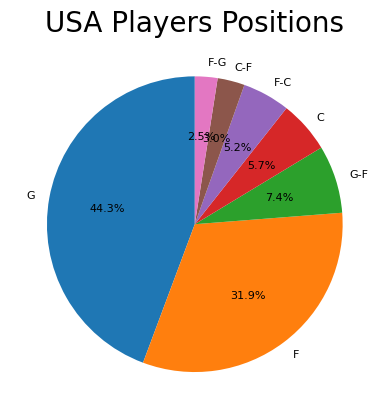

Number of players from the USA: 404


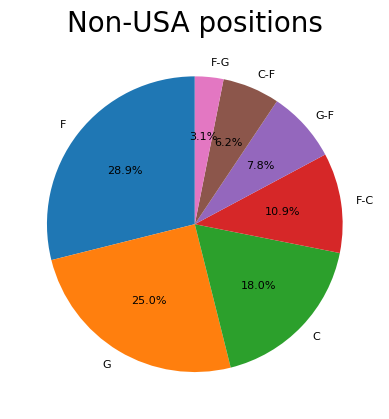

Number of players from outside the USA: 128


In [12]:
df_country = pd.read_json('../data/players_country.json')
df_country.columns = ['PLAYER_ID', 'COUNTRY']

df_pos = pd.read_json('../data/players_height_position.json')
df_pos.columns = ['PLAYER_ID', 'HEIGHT', 'POS']

df = pd.merge(df_country, df_pos, on='PLAYER_ID')

df_usa = df[df['COUNTRY'] == 'USA']

# Plot pie chart with each position
df_usa['POS'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, legend=False, fontsize=8)
plt.title('USA Players Positions', fontsize=20)
plt.ylabel('')
plt.show()

print("Number of players from the USA: " + str(len(df_usa)))

df_non_usa = df[df['COUNTRY'] != 'USA']

# Plot pie chart with each position
df_non_usa['POS'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, legend=False, fontsize=8)
plt.title('Non-USA positions', fontsize=20)
plt.ylabel('')
plt.show()

print("Number of players from outside the USA: " + str(len(df_non_usa)))

We can see there are some significative differences in the role the players occupy in their team depending if they are from the US or not.
Most notably:
44% of the US players are guards while only 25% of the non-US players are guards.
Similarly, only 6% of the US players are playing centers while 18% of the non-US players are centers.

It's an interesting finding but the root cause of this phenomenon is hard to obtain.

# AI analysis 

We are going to attempt to predict the winrate of players given their stats. We are going to use a linear regression model to do so.

Predicting a player's winrate seems like a very interesting endeavour, let's try by feeding into our model the following statistics: 
- 'FGM': Field Goals Made
- 'AST': Assists
- 'REB': Rebounds
- 'FGA': Field Goals Attempted
- 'PF': Personal Fouls
- 'FG_PCT': Field Goal Percentage
- 'TOV': Turnovers
- 'OREB': Offensive Rebounds
- 'FT_PCT': Free Throw Percentage

Mean Absolute Error: 0.11625260072083372
Mean Squared Error: 0.02700044205291953
Root Mean Squared Error: 0.16431811237024216
Correct predictions = 53
Total predictions = 87
Accuracy = 0.6091954022988506


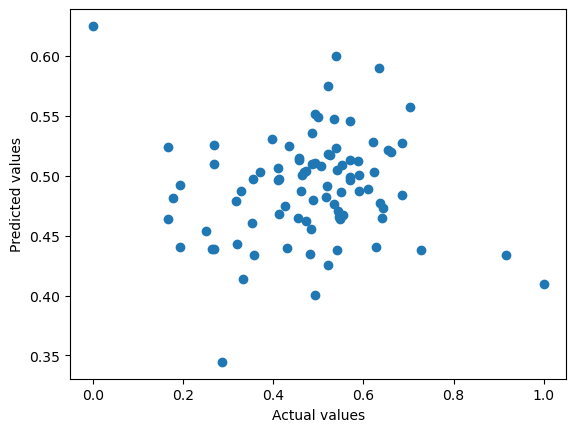

In [13]:
def compare_test_and_prediction(y_test, y_pred):
    # We are going to compare the actual values of y_test with the predicted values of y_pred

    # Let's compare the number of correct predictions with the total number of predictions
    # We will consider a prediction correct if the difference between the actual value and the predicted value is less than 10%
    tolerance = 0.1
    correct = 0
    # iterate over y_test the Pandas way
    pred_index = 0
    for index, value in y_test.items():
        if abs(value - y_pred[pred_index]) <= tolerance:
            correct += 1
        pred_index += 1

    print("Correct predictions =", correct)
    print("Total predictions =", len(y_test))
    print("Accuracy =", correct / len(y_test))


def train_model():
    df = create_players_dataset()
    
    # Let's split the dataset in 80% / 20% for training and testing
    # We will use the first 80% for training and the last 20% for testing
    
    df = df.drop('PLAYER_ID', axis=1)
    df = df.drop('POSITION', axis=1)

    x_input_data = df[['FGM', 'AST', 'REB', 'FGA', 'PF', 'FG_PCT', 'TOV', 'OREB', 'FT_PCT']]
    y_output = df['WinRate']

    X_train, X_test, y_train, y_test = train_test_split(x_input_data, y_output, test_size=0.2,
                                                        random_state=42)
    # Let's train the model
    logreg = linear_model.LinearRegression()
    logreg.fit(X_train, y_train)

    y_pred = logreg.predict(X_test)

    # Evaluate the model
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

    compare_test_and_prediction(y_test, y_pred)

    # visualize
    plt.clf()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.savefig('images/scatter_ai.png')

train_model()


It seems that our AI model is not very good at predicting a player's win rate given their various statistics. Let's ask ourselves why? 
Maybe all these statistics are not very correlated to the actual win rate of a player, so let's create a correlation pair plot and heatmap to check this:

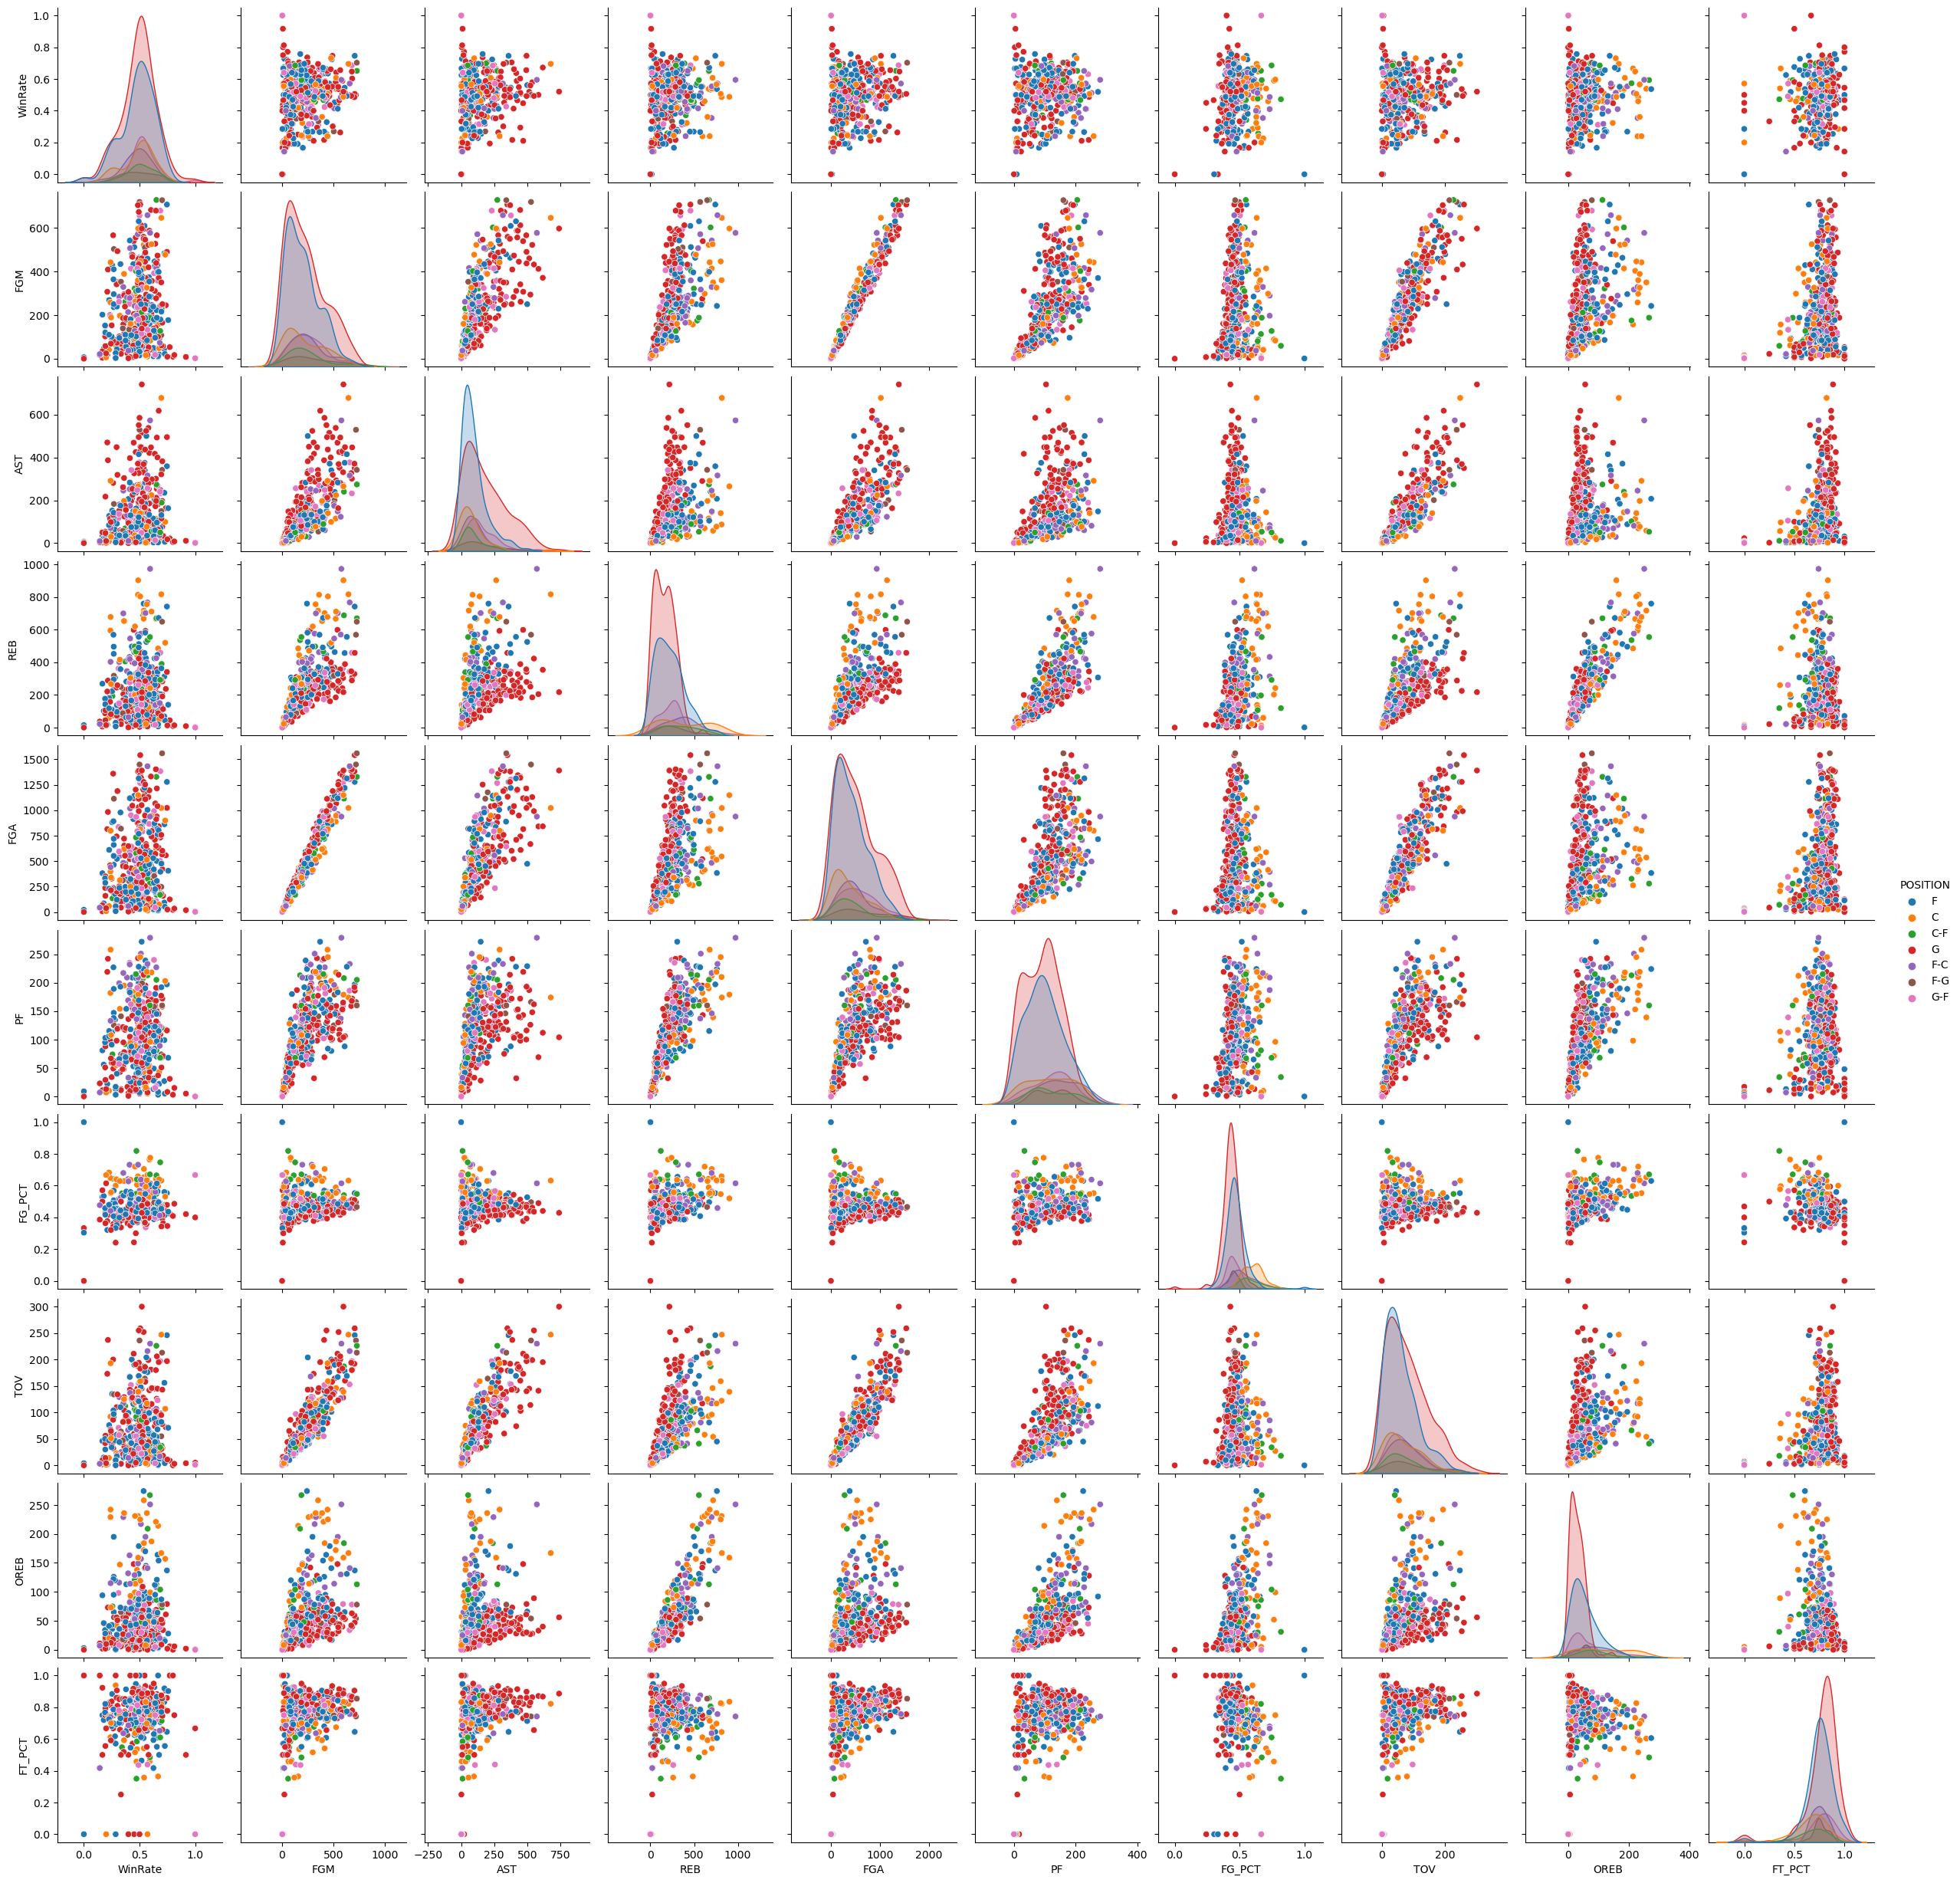

In [14]:
df = create_players_dataset()

reduced_df = df[["WinRate", 'FGM', 'AST', 'REB', 'FGA', 'PF', 'FG_PCT', 'TOV', 'OREB', 'FT_PCT', "POSITION"]]

# Can take up to 30 seconds to load
sns.pairplot(data=reduced_df, hue="POSITION")
plt.savefig('images/correlation_pairplot.png')


/tmp/ipykernel_761756/4166389238.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



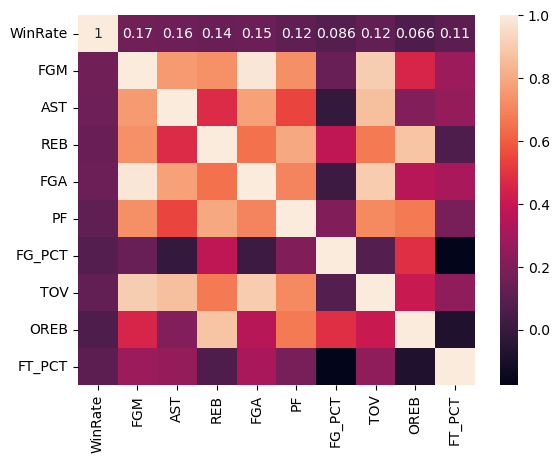

In [15]:
# let's do the same with a heatmap
sns.heatmap(reduced_df.corr(), annot=True)
plt.savefig('images/correlation_heatmap.png')



As we can see, the winrate is very poorly correlated with all these factors, so there is no reason to expect that we can predict the winrate using an AI model with only these information.

If we really wanted to go further and build an efficient predictive AI model, we would need to have access to way more data, including the data of games played and their outcome, however, this data seems hard to access using the official NBA website.

### Teams

Since we seem to be unable to predict which player will perform the better, we are now going to take a look at the different teams and we are going to see if the results of the past can predict the future.

Let's select the top 5 teams of the year 2000 as well as the top 5 teams of the year 2020.
With these teams, we are going to graph their rank over the years and see if can see any pattern.
 

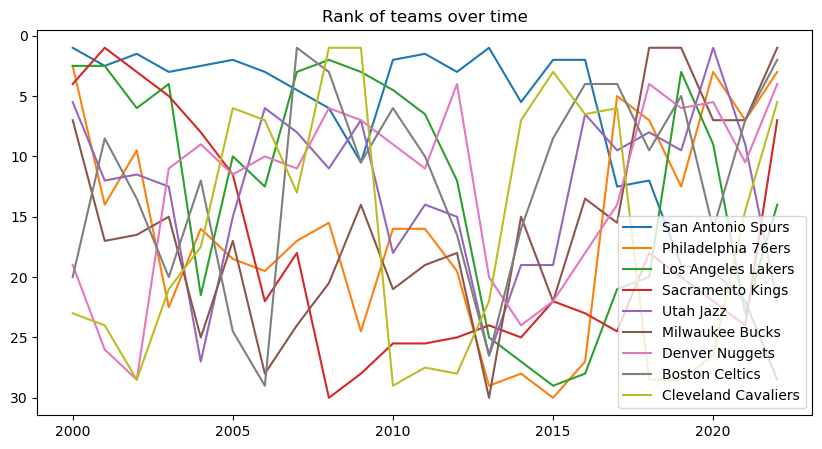

In [16]:
def build_season_dataframe(year: int) -> DataFrame:
    years = str(year) + '-' + str(year + 1)[2:]
    file_name = '../data/teams/teams_' + years + '.json'
    json_data = open(file_name).read()
    data = json.loads(json_data)

    headers = data['resultSets'][0]['headers']
    actual_data = data['resultSets'][0]['rowSet']

    df = pd.DataFrame(actual_data, columns=headers)

    df = df.sort_values(by=['W'], ascending=False)

    # Let's add a column with the rank of the team (1st, 2nd, 3rd, etc. based on the number of wins)
    df['RANK'] = df['W'].rank(ascending=False)

    final_season_view = df[['TEAM_NAME', 'W', 'RANK']]
    return final_season_view


def get_eligible_teams() -> [str]:
    eligible_teams: [str] = []

    first_year = 2000
    last_year = 2022

    for year in [first_year, last_year]:
        df = build_season_dataframe(year)
        # let's get the first 5 teams
        for index, row in df.head(5).iterrows():
            team_name = row['TEAM_NAME']
            eligible_teams.append(team_name)

    return eligible_teams

final_df = pd.DataFrame()
# This df is a timeseries of the rank of each team for each season
# This object will hold as columns the name of the team
# As rows, the rank of the team for each season
# The index will be the season (2000, 2001, 2002, etc.)

eligible_teams = get_eligible_teams()

for i in range(2000, 2023):
    # let's add the rank of the team for this season to the final_df
    # we will use the team name as column name
    # we will use the season as index

    final_season_view = build_season_dataframe(i)

    for index, row in final_season_view.iterrows():
        team_name = row['TEAM_NAME']
        if team_name not in eligible_teams:
            continue
        rank = row['RANK']
        final_df.at[i, team_name] = rank

# Let's plot this timeseries, rank is upside down
fig = final_df.plot(figsize=(10, 5), title='Rank of teams over time')
fig.invert_yaxis()
fig.get_figure().savefig('images/timeseries.png')

What wee see is pure and utter chaos, while our analysis is not complete and we would need to observe the patterns of all teams more thoroughly to be sure, it seems like it's impossible to predict which team will be at the top of at a given years given the information of the past.

If we want to observe the evolution of a specific team, let's build a small interactive program to do so:

In [17]:
def get_all_teams_available() -> [str]:
    all_teams: [str] = []

    first_year = 2000
    last_year = 2022

    for year in [first_year, last_year]:
        df = build_season_dataframe(year)
        # let's get all teams this year

        for index, row in df.iterrows():
            team_name = row['TEAM_NAME']
            all_teams.append(team_name)

    all_teams = list(dict.fromkeys(all_teams))

    return all_teams


print("The following teams are available:")
all_teams = get_all_teams_available()
print("\n".join(all_teams))

The following teams are available:
San Antonio Spurs
Philadelphia 76ers
Los Angeles Lakers
Sacramento Kings
Utah Jazz
Dallas Mavericks
Milwaukee Bucks
Phoenix Suns
Miami Heat
Portland Trail Blazers
New York Knicks
Toronto Raptors
Minnesota Timberwolves
Charlotte Hornets
Houston Rockets
Seattle SuperSonics
Orlando Magic
Indiana Pacers
Denver Nuggets
Boston Celtics
Detroit Pistons
Los Angeles Clippers
Cleveland Cavaliers
New Jersey Nets
Atlanta Hawks
Vancouver Grizzlies
Washington Wizards
Golden State Warriors
Chicago Bulls
Memphis Grizzlies
Brooklyn Nets
LA Clippers
New Orleans Pelicans
Oklahoma City Thunder


In [20]:
def resolve_team_from_user_input(all_teams: [str]) -> str:
    while True:
        candidate = input("Enter a team name: (type EXIT to exit)")
        candidate = candidate.strip()
        candidate = candidate.lower()
        if candidate == 'exit':
            raise Exception("User exited")
        if candidate == '':
            print("Please enter a valid team name (type EXIT to exit)")
            continue
        matches = []
        for team in all_teams:
            if candidate in team.lower():
                matches.append(team)
        if len(matches) == 0:
            print("No team found, please try again (type EXIT to exit)")
            continue
        if len(matches) > 1:
            print("Multiple teams found, please try again (type EXIT to exit)")
            print("\n".join(matches))
            continue

        return matches[0]

def interactive_team_tracking():
    team_to_track = resolve_team_from_user_input(all_teams)

    print("You chose to track", team_to_track)

    final_df = pd.DataFrame()

    for i in range(2000, 2023):
        final_season_view = build_season_dataframe(i)

        for index, row in final_season_view.iterrows():
            team_name = row['TEAM_NAME']
            if team_name != team_to_track:
                continue
            rank = row['RANK']
            final_df.at[i, team_name] = rank

    print(final_df)

    fig = final_df.plot(figsize=(10, 5), title=f'Rank of {team_to_track} over time')
    fig.invert_yaxis()
    fig.get_figure().savefig('images/timeseries.png')

interactive_team_tracking()

Exception: User exited

## Conclusion

Like we could have thought, predicting the future winning players and teams of the NBA is practically impossible. (otherwise the game would have no interest!)

However, as we saw, we can analyze lots of other things, including the impact of heights on the court, the age of players, their origins, and their positions and a lot of more things.